### Import Libraries

In [1]:
#code block 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import missingno as msno
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)


%matplotlib inline


plt.style.use('seaborn')

### Data Understanding

In [2]:
#code block 2

#load the data as df_car
#does not set the first column as index
#set the first header as row

df_car = pd.read_csv("data/CarSales_DataDive.csv", index_col=None, header=0)

In [3]:
#code block 3
#view the data 

display(df_car.head(3))
df_car.shape

,Unnamed: 0,city,bed,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make,maximum_seating,mileage,model,owner_count,price,salvage,savings_amount,seller_rating,theft_title,torque,transmission_display,vehicle_damage_category,wheel_system_display,wheelbase,width,year
0,273335,Denver,NaN,Pickup Truck,NaN,NaN,66.0,80231.0,8.0,NaN,V8,Grey,False,False,NaN,NaN,NaN,Gasoline,False,NaN,NaN,NaN,Black,False,39.6802,NaN,2020-07-08,GRAY,275999568.0,-104.903,https://static.cargurus.com/images/forsale/202...,['Steel Wheels'],Toyota,NaN,194490.0,Tundra,3.0,13900.0,False,766.0,4.571429,False,NaN,6-Speed Automatic Overdrive,NaN,NaN,NaN,NaN,2008.0
1,129041,Las Vegas,NaN,Sedan,23.0,NaN,66.0,89146.0,4.0,2000.0,I4,Wave Metallic,NaN,True,Cadillac,42.4 in,17.4,Gasoline,NaN,57.2,32.0,237.0,Jet Black with Jet Black Accents,True,36.1443,193.8,2020-07-07,UNKNOWN,275926401.0,-115.210,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",Cadillac,5.0,14.0,CT5,NaN,43960.0,NaN,0.0,4.387097,NaN,405.0,Automatic,NaN,Rear-Wheel Drive,116.0,80.3,2020.0
2,391889,Scottsdale,NaN,SUV / Crossover,17.0,NaN,92.0,85257.0,6.0,3500.0,V6,Shadow Black,False,True,Mitsubishi,42.9 in,18.6,Gasoline,False,70.0,24.0,290.0,Ebony Black,False,33.4657,198.3,2020-06-11,BLACK,273843787.0,-111.931,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Navigation System', 'Alloy ...",Ford,7.0,30260.0,Explorer,1.0,27300.0,False,358.0,4.132075,False,255.0,6-Speed Automatic,NaN,Front-Wheel Drive,112.8,90.2,2017.0


(215646, 49)

In [4]:
#code block 4
#show the records of df_car

df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215646 entries, 0 to 215645
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               215646 non-null  int64  
 1   city                     206239 non-null  object 
 2   bed                      1575 non-null    object 
 3   body_type                205308 non-null  object 
 4   city_fuel_economy        173883 non-null  float64
 5   combine_fuel_economy     0 non-null       float64
 6   daysonmarket             206239 non-null  float64
 7   dealer_zip               206239 non-null  float64
 8   engine_cylinders         199075 non-null  float64
 9   engine_displacement      194191 non-null  float64
 10  engine_type              199075 non-null  object 
 11  exterior_color           206234 non-null  object 
 12  frame_damaged            111298 non-null  object 
 13  franchise_dealer         206239 non-null  object 
 14  fran

<AxesSubplot:>

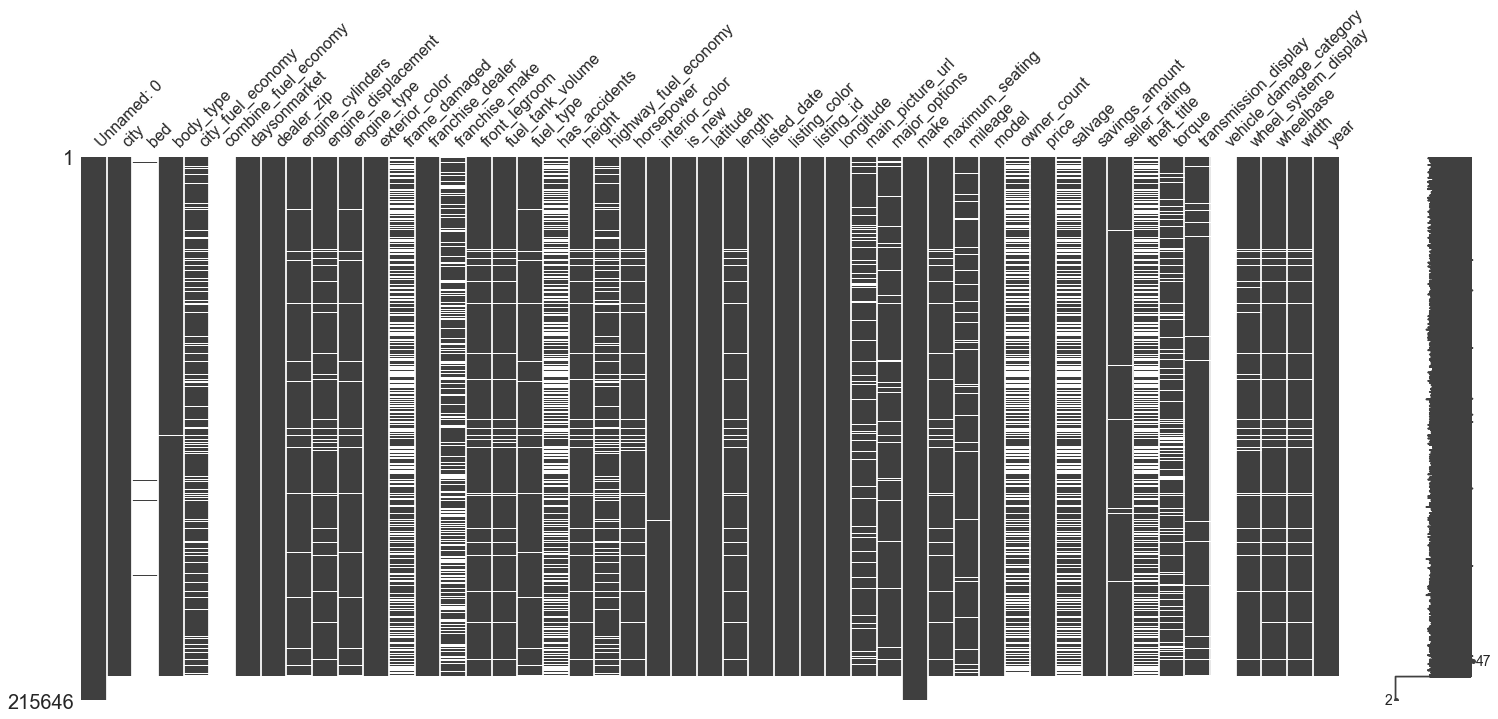

In [5]:
#code block 5
#want to see the graphical view of missing data in each column
msno.matrix(df_car)

### Data Preparation and Cleaning

In [6]:
#show the last rows of the dataset

df_car.tail(5)

,Unnamed: 0,city,bed,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make,maximum_seating,mileage,model,owner_count,price,salvage,savings_amount,seller_rating,theft_title,torque,transmission_display,vehicle_damage_category,wheel_system_display,wheelbase,width,year
215641,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215642,57602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215643,74395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215644,180586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215645,119691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#drop irrelevant columns

df_car.drop(['Unnamed: 0', 'bed', 'combine_fuel_economy','frame_damaged',\
             'has_accidents','main_picture_url','major_options', 'franchise_make',\
             'salvage','savings_amount','theft_title','vehicle_damage_category',\
            'franchise_dealer', 'listing_id'], axis=1, inplace=True)

In [8]:
#drop rows whose price are null

df_car = df_car.dropna(subset='price')

<AxesSubplot:>

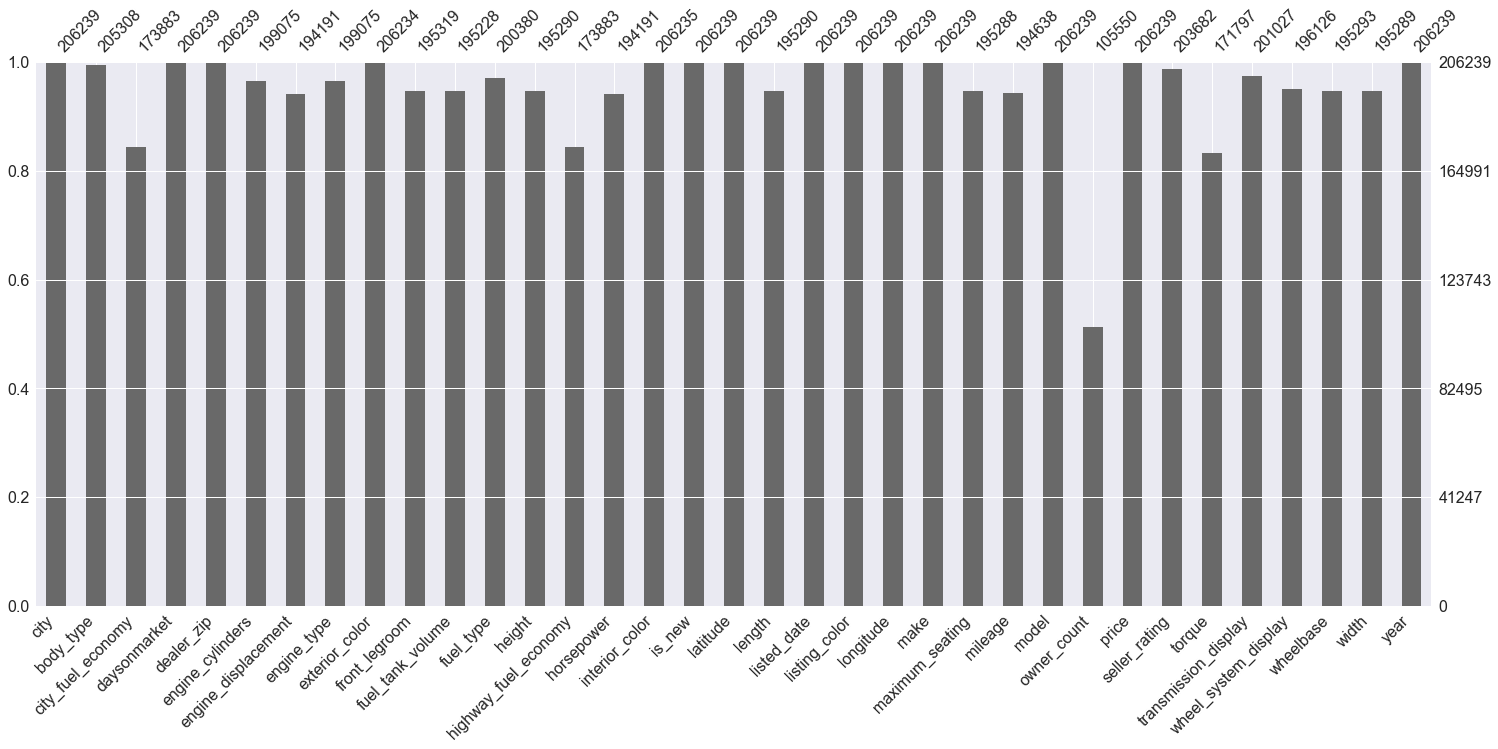

In [9]:
#view the data we have now graphically

msno.bar(df_car)

In [10]:
#fill the null values of some columns with the median

df_car['engine_cylinders'].fillna(df_car['engine_cylinders'].median(), inplace=True)
df_car['engine_displacement'].fillna(df_car['engine_displacement'].median(), inplace=True)
df_car['fuel_tank_volume'].fillna(df_car['fuel_tank_volume'].median(), inplace=True)
df_car['length'].fillna(df_car['length'].median(), inplace=True)
df_car['maximum_seating'].fillna(df_car['maximum_seating'].median(), inplace=True)
df_car['torque'].fillna(df_car['torque'].median(), inplace=True)
df_car['wheelbase'].fillna(df_car['wheelbase'].median(), inplace=True)
df_car['width'].fillna(df_car['width'].median(), inplace=True)
df_car['height'].fillna(df_car['height'].median(), inplace=True)
df_car['seller_rating'].fillna(df_car['seller_rating'].median(), inplace=True)
df_car['horsepower'].fillna(df_car['horsepower'].median(), inplace=True)
#df_car['mileage'].fillna(df_car['mileage'].median(), inplace=True)

In [11]:
#fill the missing categorical features with 'unknown'

df_car['body_type'].fillna('Unknown', inplace=True)
df_car['engine_type'].fillna('Unknown', inplace=True)
df_car['interior_color'].fillna('Unknown', inplace=True)
df_car['exterior_color'].fillna('Unknown', inplace=True)
df_car['transmission_display'].fillna('Unknown', inplace=True)
df_car['wheel_system_display'].fillna('Unknown', inplace=True)
df_car['fuel_type'].fillna('Unknown', inplace=True)

In [12]:
#feature engineer fuel_economy and drop the used features afterward
#fill the missing value with the median

df_car['fuel_economy'] = df_car['city_fuel_economy'] + df_car['highway_fuel_economy']
df_car.drop(['city_fuel_economy', 'highway_fuel_economy'], axis=1, inplace=True)
df_car['fuel_economy'].fillna(df_car['fuel_economy'].median(), inplace=True)

In [13]:
#rename some columns

df_car = df_car.rename(columns={'daysonmarket':'days_on_market', 'fuel_tank_volume':'tank_volume', 'make':'manufacturers'})

In [14]:
#front_legroom modeified for data type conversion purpose

df_car['front_legroom'] = df_car['front_legroom'].str.replace(' in',' ')

In [15]:
#convert the 'front_legroom' column to float, handling the '--' values

for i, val in enumerate(df_car['front_legroom']):
    try:
        df_car.loc[i, 'front_legroom'] = float(val)
    except ValueError:
        df_car.loc[i, 'front_legroom'] = None

In [16]:
#missing values filled with the median

df_car['front_legroom'].fillna(df_car['front_legroom'].median(), inplace=True)

In [17]:
#view some columns for proper handling of their missing data
#logically, if a car is new, then owner_count should be 0

df_car[['is_new', 'mileage', 'owner_count']]

,is_new,mileage,owner_count
0,False,194490.0,3.0
1,True,14.0,NaN
2,False,30260.0,1.0
3,False,35843.0,1.0
4,True,2.0,NaN
...,...,...,...
206234,False,43126.0,1.0
206235,True,0.0,NaN
206236,False,30574.0,1.0
206237,True,2.0,NaN


In [18]:
#new cars can reasonably be assumed to have '0' owner_count

df_car['owner_count'].fillna(0, inplace=True)

In [19]:
#the engine_cylinders and fuel_type basically explain the engine_type
#drop engine_type

display(df_car[['engine_cylinders','engine_type','fuel_type']])
df_car.drop('engine_type', axis=1, inplace=True)

,engine_cylinders,engine_type,fuel_type
0,8.0,V8,Gasoline
1,4.0,I4,Gasoline
2,6.0,V6,Gasoline
3,4.0,I4,Gasoline
4,4.0,I4,Gasoline
...,...,...,...
206234,4.0,I4,Gasoline
206235,8.0,V8 Flex Fuel Vehicle,Flex Fuel Vehicle
206236,6.0,V6,Gasoline
206237,6.0,V6,Gasoline


**Decided to check more closely on the new cars if we can safely assume that new cars equal little or no mileage for a car**

In [20]:
#filter new cars

new_cars = df_car[df_car['is_new']==True]

In [21]:
#info of the new cars dataframe

new_cars.isna().sum()

city                        0
body_type                   0
days_on_market              0
dealer_zip                  0
engine_cylinders            0
engine_displacement         0
exterior_color              0
front_legroom               0
tank_volume                 0
fuel_type                   0
height                      0
horsepower                  0
interior_color              0
is_new                      0
latitude                    0
length                      0
listed_date                 0
listing_color               0
longitude                   0
manufacturers               0
maximum_seating             0
mileage                 10325
model                       0
owner_count                 0
price                       0
seller_rating               0
torque                      0
transmission_display        0
wheel_system_display        0
wheelbase                   0
width                       0
year                        0
fuel_economy                0
dtype: int

In [22]:
#summary statistics of the new_car dataframe

round(new_cars.describe())

,days_on_market,dealer_zip,engine_cylinders,engine_displacement,front_legroom,tank_volume,height,horsepower,latitude,length,longitude,maximum_seating,mileage,owner_count,price,seller_rating,torque,wheelbase,width,year,fuel_economy
count,97591.0,97591.0,97591.0,97591.0,97591.0,97591.0,97591.0,97591.0,97591.0,97591.0,97591.0,97591.0,87266.0,97591.0,97591.0,97591.0,97591.0,97591.0,97591.0,97591.0,97591.0
mean,90.0,60952.0,5.0,2811.0,42.0,18.0,66.0,246.0,34.0,193.0,-94.0,5.0,1320.0,0.0,36911.0,4.0,264.0,115.0,78.0,2020.0,54.0
std,105.0,22783.0,1.0,1308.0,1.0,5.0,7.0,90.0,4.0,21.0,12.0,1.0,338524.0,0.0,18504.0,0.0,111.0,15.0,8.0,0.0,15.0
min,0.0,1105.0,2.0,700.0,36.0,2.0,47.0,78.0,26.0,143.0,-122.0,2.0,0.0,0.0,8916.0,1.0,74.0,91.0,63.0,2017.0,28.0
25%,17.0,33619.0,4.0,2000.0,41.0,14.0,60.0,174.0,30.0,182.0,-99.0,5.0,2.0,0.0,24500.0,4.0,184.0,106.0,73.0,2020.0,46.0
50%,45.0,73162.0,4.0,2500.0,42.0,17.0,66.0,241.0,34.0,190.0,-95.0,5.0,6.0,0.0,32465.0,4.0,258.0,111.0,76.0,2020.0,51.0
75%,139.0,78729.0,6.0,3500.0,43.0,20.0,70.0,296.0,37.0,199.0,-83.0,6.0,11.0,0.0,44900.0,4.0,273.0,119.0,83.0,2020.0,59.0
max,1159.0,95148.0,12.0,7300.0,54.0,64.0,118.0,797.0,46.0,290.0,-71.0,15.0,99999988.0,2.0,545150.0,5.0,935.0,180.0,106.0,2021.0,248.0


**From the descriptive statistics, it is surprising to see a new car that has a mileage greater than 90000000, decided to look further on this particular car...***

In [23]:
#view car greater than 90000000

new_cars[new_cars['mileage'] > 90000000]

,city,body_type,days_on_market,dealer_zip,engine_cylinders,engine_displacement,exterior_color,front_legroom,tank_volume,fuel_type,height,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,longitude,manufacturers,maximum_seating,mileage,model,owner_count,price,seller_rating,torque,transmission_display,wheel_system_display,wheelbase,width,year,fuel_economy
37436,Houston,Pickup Truck,433.0,77065.0,6.0,2500.0,Diamond Black Crystal Pearlcoat,41.9,17.4,Diesel,66.0,241.0,Diesel Gray/Black,True,29.9117,189.8,2019-07-06,BLACK,-95.6118,RAM,5.0,99999988.0,3500 Chassis,0.0,52610.0,3.571429,258.0,Automatic,Unknown,111.0,75.8,2019.0,51.0


In [24]:
#opt to drop this car from the analysis

df_car.drop(df_car[df_car['mileage'] > 90000000].index, inplace=True)
#new_cars.drop(new_cars[new_cars['mileage'] > 90000000].index, inplace=True)

In [25]:
#drop rows whose mileage are null

df_car.dropna(subset='mileage', inplace=True)

In [26]:
#value count of transmission display

df_car['transmission_display'].value_counts()

Automatic                             89558
Continuously Variable Transmission    29516
6-Speed Automatic                     24266
8-Speed Automatic                     18500
9-Speed Automatic                      7094
6-Speed Automatic Overdrive            5003
Unknown                                4822
7-Speed Automatic                      3371
5-Speed Automatic                      2840
4-Speed Automatic                      2200
Manual                                 1510
6-Speed Manual                         1473
5-Speed Automatic Overdrive             743
8-Speed Automatic Overdrive             680
5-Speed Manual                          561
1-Speed Automatic                       545
4-Speed Automatic Overdrive             451
6-Speed Dual Clutch                     336
8-Speed Dual Clutch                     247
9-Speed Automatic Overdrive             219
7-Speed CVT                             142
7-Speed Automatic Overdrive             137
7-Speed Dual Clutch             

In [27]:
#function to rename some categories in transmission display
#value count after the rename

def transmissions(c):
    trans = str(c['transmission_display'])
    if trans == 'nan':
        return None
    
    if 'Automatic' in c['transmission_display']:
        return 'Automatic'
    elif 'Manual' in c['transmission_display']:
        return 'Manual'
    elif 'Dual Clutch' in c['transmission_display']:
        return 'Dual Clutch'
    else:
        return 'CVT'
    
df_car['transmission_display'] = df_car.apply(transmissions, axis = 1)
df_car['transmission_display'].value_counts()

Automatic      155667
CVT             34526
Manual           3730
Dual Clutch       714
Name: transmission_display, dtype: int64

In [28]:
#function to better explain the days_on_market column

def numofdays(a):
    if a['days_on_market'] > 180:
        return 'above 180 days'
    elif a['days_on_market'] >= 160:
        return '160-179'
    elif a['days_on_market'] >= 140:
        return '140-159'
    elif a['days_on_market'] >= 120:
        return '120-139'
    elif a['days_on_market'] >= 100:
        return '100-119'
    elif a['days_on_market'] >= 80:
        return '80-99'
    elif a['days_on_market'] >= 60:
        return '60-79'
    elif a['days_on_market'] >= 40:
        return '40-59'
    elif a['days_on_market'] >= 20:
        return '20-39'
    else:
        return 'less than 20 days'
    
df_car['days_on_market'] = df_car.apply(numofdays, axis = 1)

In [29]:
#function to better explain the seller_rating column

def rating (s):
    if s['seller_rating'] > 4.5:
        return 'Excellent'
    elif s['seller_rating'] >= 4.0:
        return 'Good'
    elif s['seller_rating'] >= 3.0:
        return 'Average'
    elif s['seller_rating'] >= 2.0:
        return 'Fair'
    else:
        return 'Poor'
    
df_car['seller_rating'] = df_car.apply(rating, axis = 1)

In [30]:
display(df_car['manufacturers'].unique())
df_car['manufacturers'] = df_car['manufacturers'].replace({'chevrolet':'Chevrolet','ford':'Ford','smart':'Smart'})

array(['Toyota', 'Cadillac', 'Ford', 'Chevrolet', 'Hyundai', 'chevrolet',
       'MINI', 'Mercedes-Benz', 'Volkswagen', 'Nissan', 'Alfa Romeo',
       'Mitsubishi', 'ford', 'Honda', 'Kia', 'Buick', 'GMC', 'Mazda',
       'Lexus', 'Maserati', 'Volvo', 'Chrysler', 'Audi', 'Jeep', 'BMW',
       'INFINITI', 'Porsche', 'Acura', 'RAM', 'Subaru', 'Tesla', 'Jaguar',
       'Lincoln', 'Dodge', 'Ferrari', 'FIAT', 'Hummer', 'Bentley',
       'Pontiac', 'Land Rover', 'Suzuki', 'Rolls-Royce', 'Lamborghini',
       'Genesis', 'smart', 'Aston Martin', 'Lotus', 'Saturn', 'McLaren',
       'Scion', 'Mercury', 'Isuzu', 'Oldsmobile', 'Bugatti', 'Karma',
       'Willys', 'Fisker', 'Edsel', 'Plymouth', 'Saab', 'Shelby',
       'Freightliner', 'Sunbeam', 'Pininfarina', 'AMC', 'SRT',
       'AM General', 'DeTomaso', 'Triumph', 'Datsun'], dtype=object)

#### Convert data types of some columns

In [31]:
df_car['is_new'] = df_car['is_new'].astype(bool)
df_car['listed_date'] = pd.to_datetime(df_car['listed_date'])
df_car['owner_count'] = df_car['owner_count'].astype('int64')
df_car['engine_cylinders'] = df_car['engine_cylinders'].astype('int64')
df_car['year'] = df_car['year'].astype('int64')
df_car['maximum_seating'] = df_car['maximum_seating'].astype('int64')

In [32]:
#rename the column names appropriately

df_car = df_car.rename(columns = lambda x: x.title())

In [33]:
#view random rows and the properties of df_car

display(df_car.sample(3))
df_car.info()

,City,Body_Type,Days_On_Market,Dealer_Zip,Engine_Cylinders,Engine_Displacement,Exterior_Color,Front_Legroom,Tank_Volume,Fuel_Type,Height,Horsepower,Interior_Color,Is_New,Latitude,Length,Listed_Date,Listing_Color,Longitude,Manufacturers,Maximum_Seating,Mileage,Model,Owner_Count,Price,Seller_Rating,Torque,Transmission_Display,Wheel_System_Display,Wheelbase,Width,Year,Fuel_Economy
74046,Tampa,Pickup Truck,less than 20 days,33619.0,6,6700.0,Bright White Clearcoat,40.9,32.0,Diesel,79.3,370.0,Brown (Lt Frost Beige/Mountain),False,27.9485,260.8,2020-09-06,WHITE,-82.3465,RAM,6,11449.0,3500,1,66988.0,Good,850.0,Automatic,Four-Wheel Drive,169.0,96.5,2019,51.0
9535,Houston,Sedan,less than 20 days,77031.0,6,3000.0,Nero,37.7,21.1,Gasoline,57.5,345.0,Black (Rosso (Red)),True,29.6501,195.7,2020-08-31,UNKNOWN,-95.5704,Maserati,5,0.0,Ghibli,0,84235.0,Good,369.0,Automatic,Rear-Wheel Drive,118.0,83.8,2020,41.0
165137,San Antonio,SUV / Crossover,above 180 days,78232.0,4,2000.0,White Frost Tricoat,40.9,14.9,Gasoline,65.4,252.0,Brandy/Jet Black,True,29.6049,182.3,2020-03-02,WHITE,-98.4701,GMC,5,0.0,Terrain,0,30565.0,Good,260.0,Automatic,Front-Wheel Drive,107.3,72.4,2020,56.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 194637 entries, 0 to 206238
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   City                  194637 non-null  object        
 1   Body_Type             194637 non-null  object        
 2   Days_On_Market        194637 non-null  object        
 3   Dealer_Zip            194637 non-null  float64       
 4   Engine_Cylinders      194637 non-null  int64         
 5   Engine_Displacement   194637 non-null  float64       
 6   Exterior_Color        194637 non-null  object        
 7   Front_Legroom         194637 non-null  float64       
 8   Tank_Volume           194637 non-null  float64       
 9   Fuel_Type             194637 non-null  object        
 10  Height                194637 non-null  float64       
 11  Horsepower            194637 non-null  float64       
 12  Interior_Color        194637 non-null  object        
 13 

### Explore the data

Let's take a look at our data to gain more insights about the data...

In [34]:
df_car_avgprice = df_car.groupby('Manufacturers')['Price'].mean()
df_car_avgprice = pd.DataFrame(df_car_avgprice).reset_index()
df_car_avgprice = df_car_avgprice.sort_values('Price', ascending=False)
df_car_avgprice = round(df_car_avgprice.head(10),2)
df_car_avgprice

,Manufacturers,Price
8,Bugatti,1244996.00
52,Rolls-Royce,254723.70
41,McLaren,239625.52
33,Lamborghini,233482.54
18,Ferrari,221723.68
4,Aston Martin,164107.57
57,Shelby,143999.00
31,Karma,126562.50
7,Bentley,125131.50
14,DeTomaso,125000.00


Text(0, 0.5, 'Car Manufacturers')

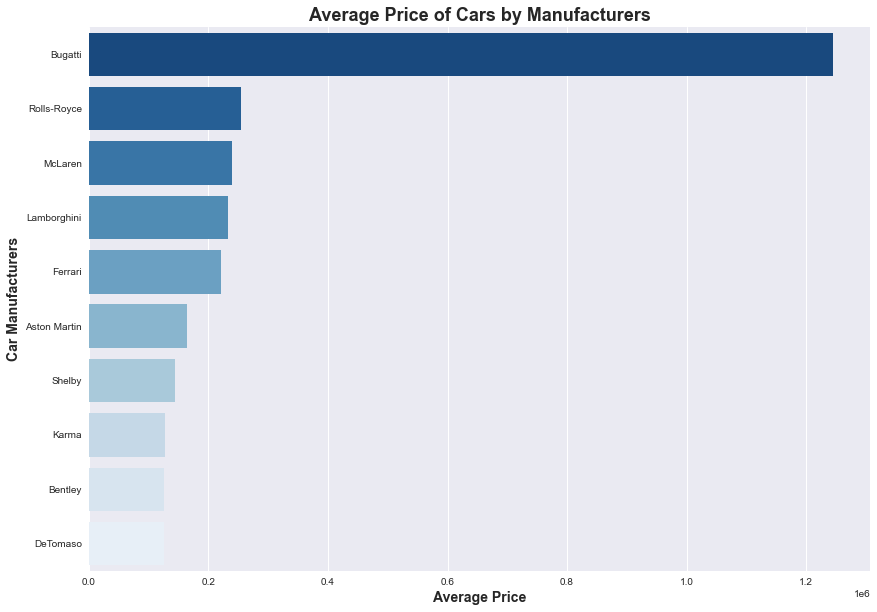

In [35]:
plt.figure(figsize=(14,10))
sns.barplot(x='Price', y='Manufacturers', data=df_car_avgprice, palette='Blues_r')
plt.title('Average Price of Cars by Manufacturers', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Average Price', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Car Manufacturers', fontweight='bold', fontsize=14, horizontalalignment='center')

Bugatti happens to be the most expensive car, on the average, of about 1,200,000 from the dataset we are analysing, with Roys Royce being the second. 

In [36]:
df_car_mostused = df_car.groupby('Manufacturers')['Manufacturers'].count()
df_car_mostused = pd.DataFrame(df_car_mostused)
df_car_mostused = df_car_mostused.rename(columns={'Manufacturers': 'Count'}).reset_index()
df_car_mostused = df_car_mostused.sort_values('Count',ascending=False)
df_car_mostused = df_car_mostused.head(10)
df_car_mostused

,Manufacturers,Count
20,Ford,30474
11,Chevrolet,25131
63,Toyota,15465
45,Nissan,14959
24,Honda,13277
30,Jeep,9130
26,Hyundai,8420
32,Kia,7402
65,Volkswagen,5989
22,GMC,5780


Text(0, 0.5, 'Manufacturers')

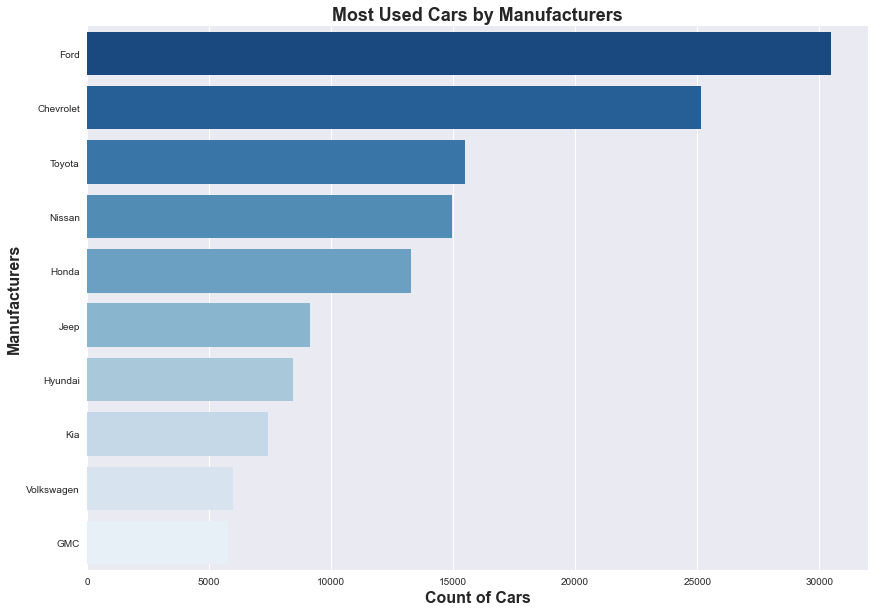

In [37]:
plt.figure(figsize=(14,10))
sns.barplot(x='Count', y='Manufacturers', data=df_car_mostused, palette='Blues_r')
plt.title('Most Used Cars by Manufacturers', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Count of Cars', fontweight='bold', fontsize=16, horizontalalignment='center')
plt.ylabel('Manufacturers', fontweight='bold', fontsize=16, horizontalalignment='center')

Personally, seeing Ford as the most used car in this dataset is not surprising, this is because you simply cannot miss seeing a Ford car on the American road at every 3-5 minute. Chevrolet, Toyota and Nissan are also quite popular.

In [38]:
df_new = df_car.groupby('Is_New')['Is_New'].count()
df_new = pd.DataFrame(df_new)
df_new = df_new.rename(columns={'Is_New': 'Count'}).reset_index()
df_new

,Is_New,Count
0,False,107372
1,True,87265


In [39]:
df_bodytype = df_car.groupby('Body_Type')['Body_Type'].count()
df_bodytype = pd.DataFrame(df_bodytype)
df_bodytype = df_bodytype.rename(columns={'Body_Type': 'Count'}).reset_index()
df_bodytype = df_bodytype.sort_values('Count',ascending=False)
df_bodytype = df_bodytype.head(10)
df_bodytype

,Body_Type,Count
5,SUV / Crossover,89141
6,Sedan,53236
4,Pickup Truck,26522
2,Hatchback,6325
1,Coupe,5783
3,Minivan,5043
9,Wagon,2850
8,Van,2789
0,Convertible,2140
7,Unknown,808


Text(0.5, 1.0, 'Count of Cars by Body Type')

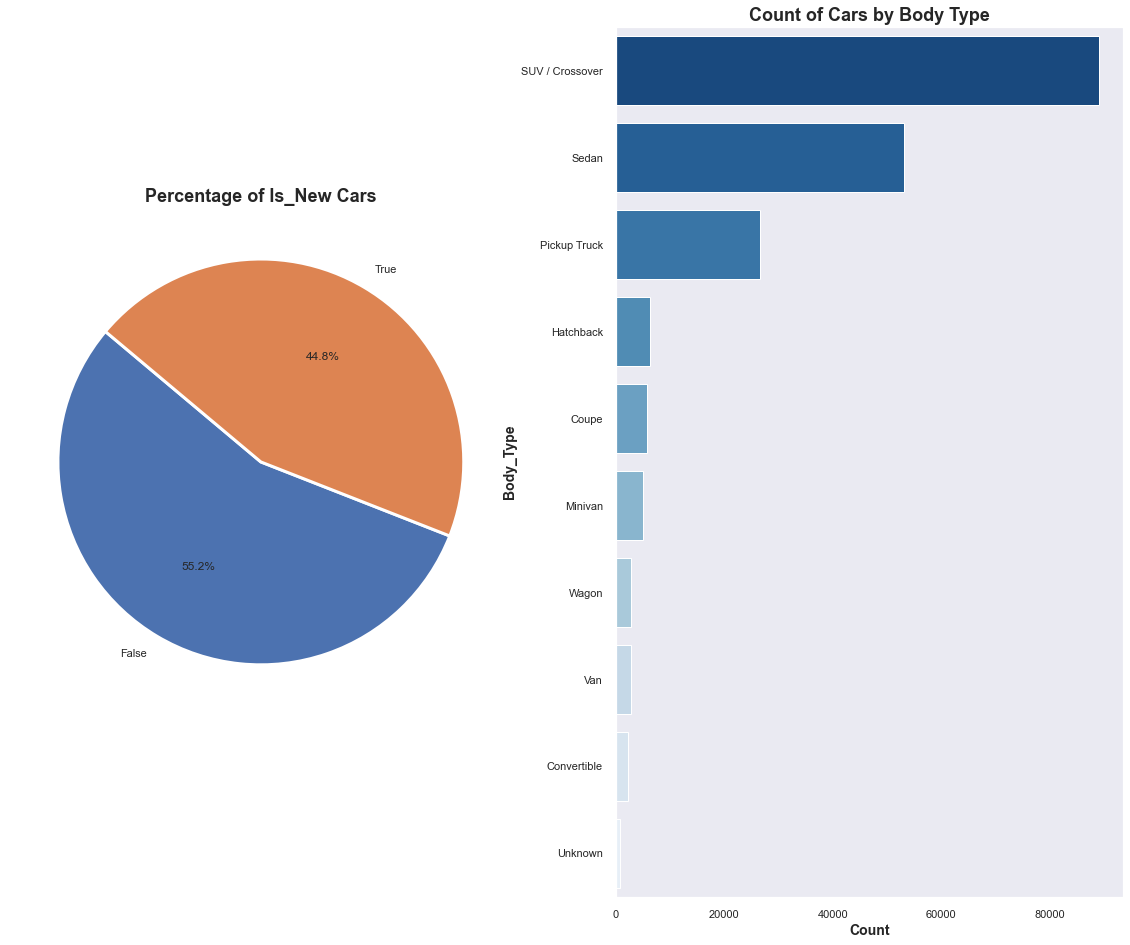

In [40]:
sns.set(style='dark')
plt.figure(figsize=(20,16))
plt.subplot(121)
plt.pie(df_new['Count'], wedgeprops = {'linewidth': 3}, labels=df_new['Is_New'], startangle=140, autopct='%1.1f%%')
plt.title('Percentage of Is_New Cars', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.subplot(122)
sns.barplot(y = "Body_Type", x = "Count", data = df_bodytype, palette = 'Blues_r')
plt.xlabel('Count', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Body_Type', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.title('Count of Cars by Body Type', fontweight='bold', fontsize=18, horizontalalignment='center')

So, the pie chart shows the percentage of cars in the dataset that are new or not new. It is calculated that 44.8% of the cars in the dataset are new while 55.2% are not new.

The bar plot by the side shows the count of vehicles by their body type, SUV/Crossover are the most used vehicle type in oue analysis and sedan cars are next.

In [41]:
df_daysonmarket = df_car.groupby('Days_On_Market')['Price'].mean()
df_daysonmarket = pd.DataFrame(df_daysonmarket).reset_index()
custom_dict = {'less than 20 days': 0, '20-39': 1, '20-39': 2, '40-59': 3,\
              '60-79': 4, '80-99': 5, '100-119': 6, '120-139': 7, '140-159': 8,\
              '160-179': 9, 'above 180 days': 10}
df_daysonmarket = df_daysonmarket.sort_values(by=['Days_On_Market'], key=lambda x: x.map(custom_dict))
df_daysonmarket = round(df_daysonmarket, 2)
df_daysonmarket

,Days_On_Market,Price
9,less than 20 days,28100.12
4,20-39,27925.54
5,40-59,28547.28
6,60-79,28089.52
7,80-99,28439.48
0,100-119,27145.87
1,120-139,26838.40
2,140-159,28709.25
3,160-179,32990.19
8,above 180 days,33250.97


(0.0, 35000.0)

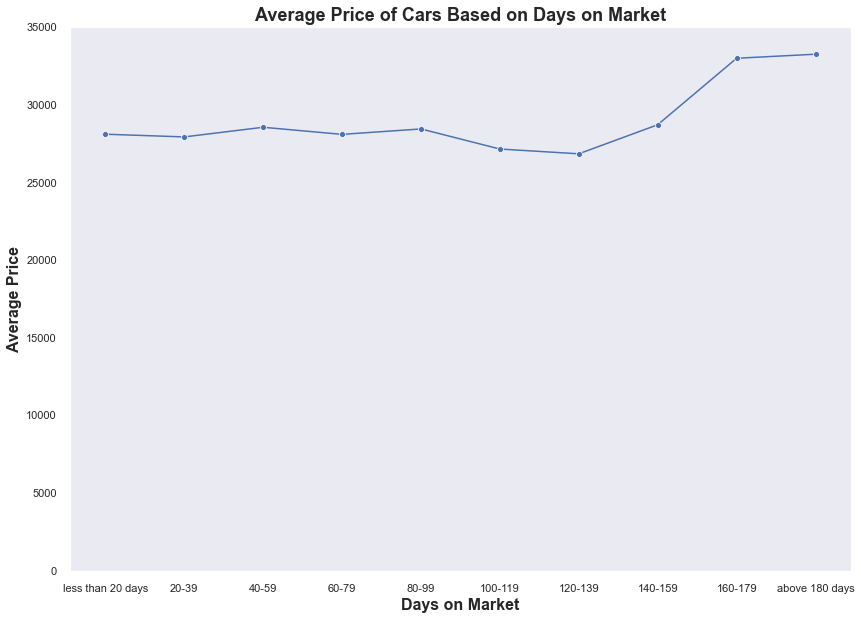

In [42]:
plt.figure(figsize=(14,10))
sns.lineplot(x='Days_On_Market', y='Price', data=df_daysonmarket, markers='', marker='o')
plt.title('Average Price of Cars Based on Days on Market', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Days on Market', fontweight='bold', fontsize=16, horizontalalignment='center')
plt.ylabel('Average Price', fontweight='bold', fontsize=16, horizontalalignment='center')
plt.ylim((0, 35000))

This plot shows the trend of average price of cars based on the days on the market. The cars that stay on the market above 180 days have the highest average price, follow closely by the cars that stay between 160 and 179 days. The lowest average price based on this trend are the cars thay are in market for 120-139 days, with the 100-119 days just above it.

In [43]:
#summary statistics of the price column

round(df_car['Price'].describe())

count     194637.0
mean       28869.0
std        20710.0
min          750.0
25%        16997.0
50%        24924.0
75%        36845.0
max      1750000.0
Name: Price, dtype: float64

In [44]:
#view the cars that above 1m

df_over1m = df_car[df_car['Price']>=1000000]
df_over1m

,City,Body_Type,Days_On_Market,Dealer_Zip,Engine_Cylinders,Engine_Displacement,Exterior_Color,Front_Legroom,Tank_Volume,Fuel_Type,Height,Horsepower,Interior_Color,Is_New,Latitude,Length,Listed_Date,Listing_Color,Longitude,Manufacturers,Maximum_Seating,Mileage,Model,Owner_Count,Price,Seller_Rating,Torque,Transmission_Display,Wheel_System_Display,Wheelbase,Width,Year,Fuel_Economy
21815,Charlotte,Coupe,40-59,28203.0,16,8000.0,RED / BLACK,41.9,26.4,Gasoline,47.4,1001.0,Black,False,35.2179,175.7,2020-07-15,RED,-80.8543,Bugatti,2,8597.0,Veyron,9,1244996.0,Excellent,922.0,Automatic,All-Wheel Drive,106.7,78.7,2008,22.0
154314,Dallas,Coupe,40-59,75247.0,8,3800.0,Titanium Silver,41.9,19.0,Gasoline,46.8,903.0,Carbon Black with Black Insert,False,32.8147,180.6,2020-07-14,SILVER,-96.8674,McLaren,2,256.0,P1,1,1750000.0,Excellent,664.0,Automatic,Rear-Wheel Drive,105.1,84.4,2014,36.0
163706,Las Vegas,Coupe,80-99,89146.0,12,6300.0,Red,41.9,24.3,Gasoline,50.1,731.0,Black,False,36.1445,181.8,2020-06-13,RED,-115.2170,Ferrari,2,149.0,F12 Berlinetta,1,1095000.0,Excellent,509.0,Dual Clutch,Rear-Wheel Drive,107.1,76.5,2017,28.0


In [45]:
#drop the cars above 1m as they serve as outlying value

df_car = df_car.drop(index=df_car[df_car['Price']>=1000000].index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Houston'),
  Text(1, 0, 'San Antonio'),
  Text(2, 0, 'Columbus'),
  Text(3, 0, 'Miami'),
  Text(4, 0, 'Jacksonville'),
  Text(5, 0, 'Phoenix'),
  Text(6, 0, 'Las Vegas'),
  Text(7, 0, 'Tampa'),
  Text(8, 0, 'Dallas'),
  Text(9, 0, 'Orlando'),
  Text(10, 0, 'Austin'),
  Text(11, 0, 'Cincinnati'),
  Text(12, 0, 'Indianapolis'),
  Text(13, 0, 'Columbia'),
  Text(14, 0, 'Denver'),
  Text(15, 0, 'Charlotte'),
  Text(16, 0, 'Springfield'),
  Text(17, 0, 'Tucson'),
  Text(18, 0, 'Oklahoma City'),
  Text(19, 0, 'El Paso'),
  Text(20, 0, 'Raleigh'),
  Text(21, 0, 'Louisville'),
  Text(22, 0, 'Madison'),
  Text(23, 0, 'San Jose'),
  Text(24, 0, 'Stafford'),
  Text(25, 0, 'Albuquerque'),
  Text(26, 0, 'Chicago'),
  Text(27, 0, 'Arlington'),
  Text(28, 0, 'Richmond'),
  Text(29, 0, 'Scottsdale')])

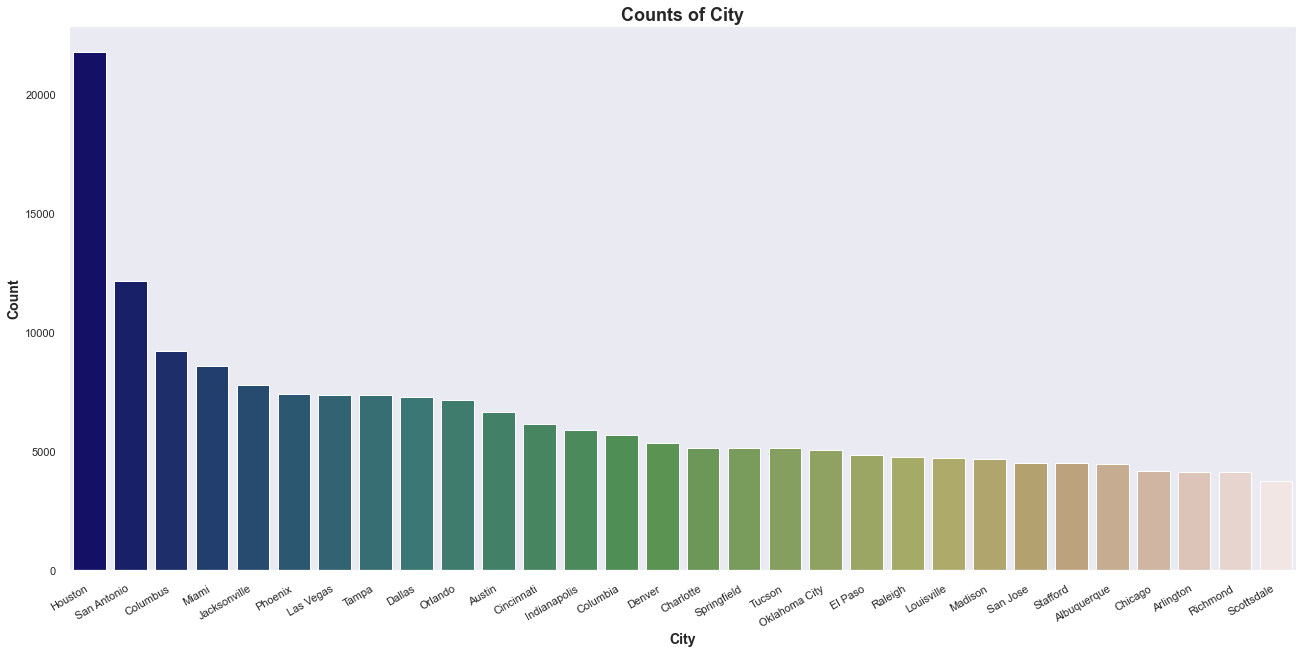

In [46]:
plt.figure(figsize=(22,10))
sns.countplot(df_car['City'], order=df_car['City'].value_counts().index, palette='gist_earth')
plt.title('Counts of City', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('City', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)
plt.xticks(rotation=30, ha='right')

Houston is the city with the most car count in our data, with a wide margin to the second city which is San Antonio. Scottdale is the city with the least count.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(0, 0, 'Toyota'),
  Text(1, 0, 'Cadillac'),
  Text(2, 0, 'Ford'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Hyundai'),
  Text(5, 0, 'MINI'),
  Text(6, 0, 'Mercedes-Benz'),
  Text(7, 0, 'Volkswagen'),
  Text(8, 0, 'Nissan'),
  Text(9, 0, 'Alfa Romeo'),
  Text(10, 0, 'Mitsubishi'),
  Text(11, 0, 'Honda'),
  Text(12, 0, 'Kia'),
  Text(13, 0, 'Buick'),
  Text(14, 0, 'GMC'),
  Text(15, 0, 'Mazda'),
  Text(16, 0, 'Lexus'),
  Text(17, 0, 'Maserati'),
  Text(18, 0, 'Volvo'),
  Text(19, 0, 'Chrysler'),
  Text(20, 0, 'Audi'),
  Text(21, 0, 'Jeep'),
  Text(22, 0, 'BMW'),
  Text(23, 0, 'INFINITI'),
  Text(24, 0, 'Porsche'),
  Text(25, 0, 'Acura'),
  Text(26, 0, 'RAM'),
  Text(27, 0, 'Subaru'),
  

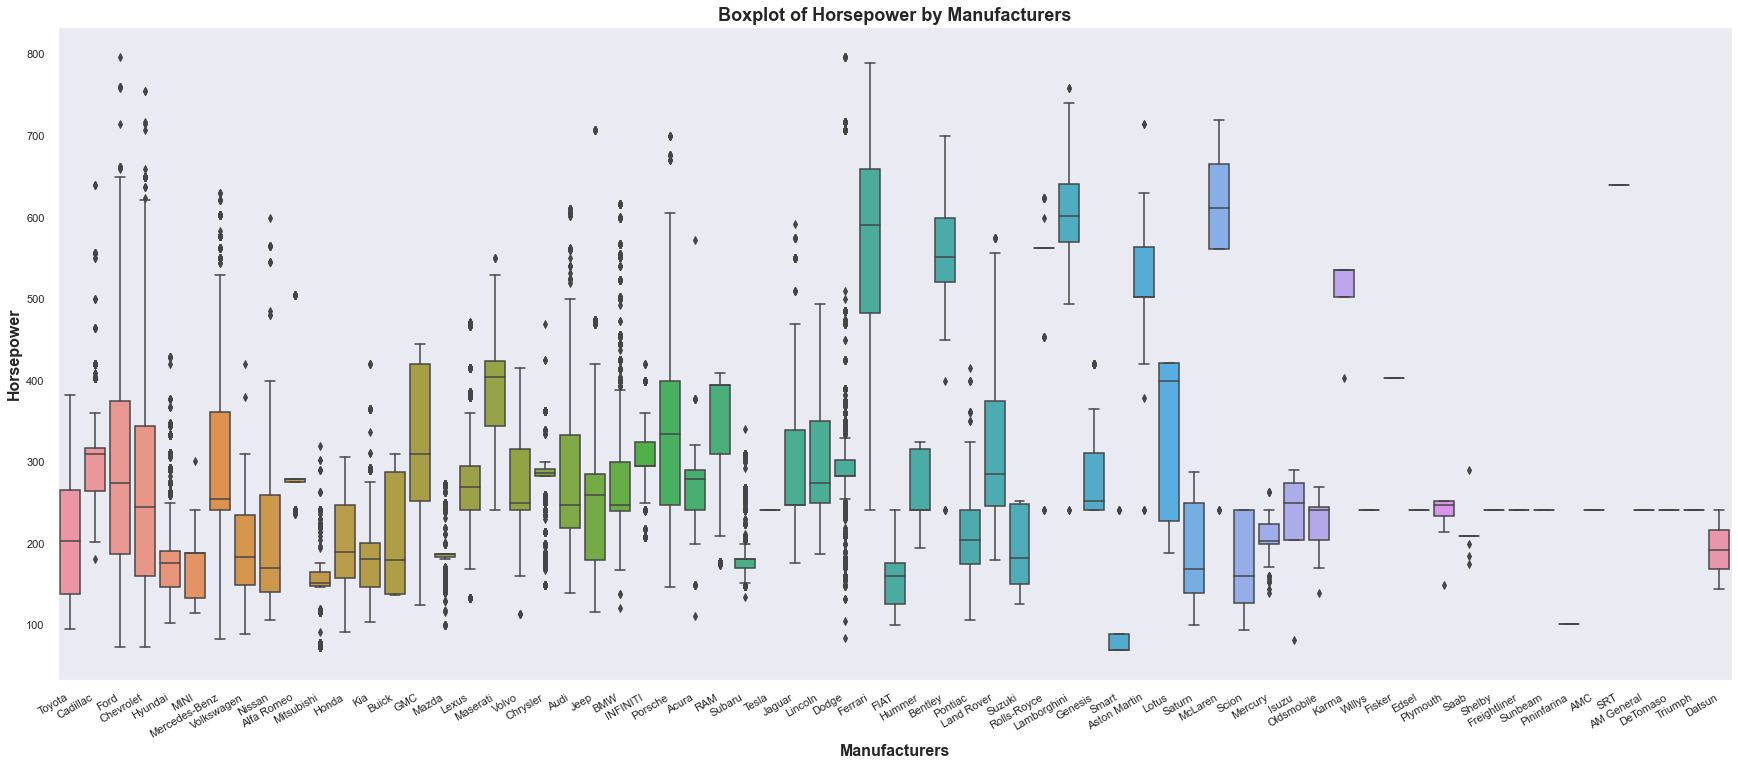

In [47]:
plt.figure(figsize=(30,12))
sns.boxplot(x='Manufacturers', y='Horsepower', data=df_car)
plt.title('Boxplot of Horsepower by Manufacturers', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Manufacturers', fontweight='bold', fontsize=16, horizontalalignment='center')
plt.ylabel('Horsepower', fontweight='bold', fontsize=16, horizontalalignment='center')
plt.xticks(rotation=30, ha='right')

The boxplot shows the horsepower of the cars by manufacturers. Noticeably, Ferrari, Lamborghini, McLaren and Bentley have the highest average horsepower of above 500.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(0, 0, 'Toyota'),
  Text(1, 0, 'Cadillac'),
  Text(2, 0, 'Ford'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Hyundai'),
  Text(5, 0, 'MINI'),
  Text(6, 0, 'Mercedes-Benz'),
  Text(7, 0, 'Volkswagen'),
  Text(8, 0, 'Nissan'),
  Text(9, 0, 'Alfa Romeo'),
  Text(10, 0, 'Mitsubishi'),
  Text(11, 0, 'Honda'),
  Text(12, 0, 'Kia'),
  Text(13, 0, 'Buick'),
  Text(14, 0, 'GMC'),
  Text(15, 0, 'Mazda'),
  Text(16, 0, 'Lexus'),
  Text(17, 0, 'Maserati'),
  Text(18, 0, 'Volvo'),
  Text(19, 0, 'Chrysler'),
  Text(20, 0, 'Audi'),
  Text(21, 0, 'Jeep'),
  Text(22, 0, 'BMW'),
  Text(23, 0, 'INFINITI'),
  Text(24, 0, 'Porsche'),
  Text(25, 0, 'Acura'),
  Text(26, 0, 'RAM'),
  Text(27, 0, 'Subaru'),
  

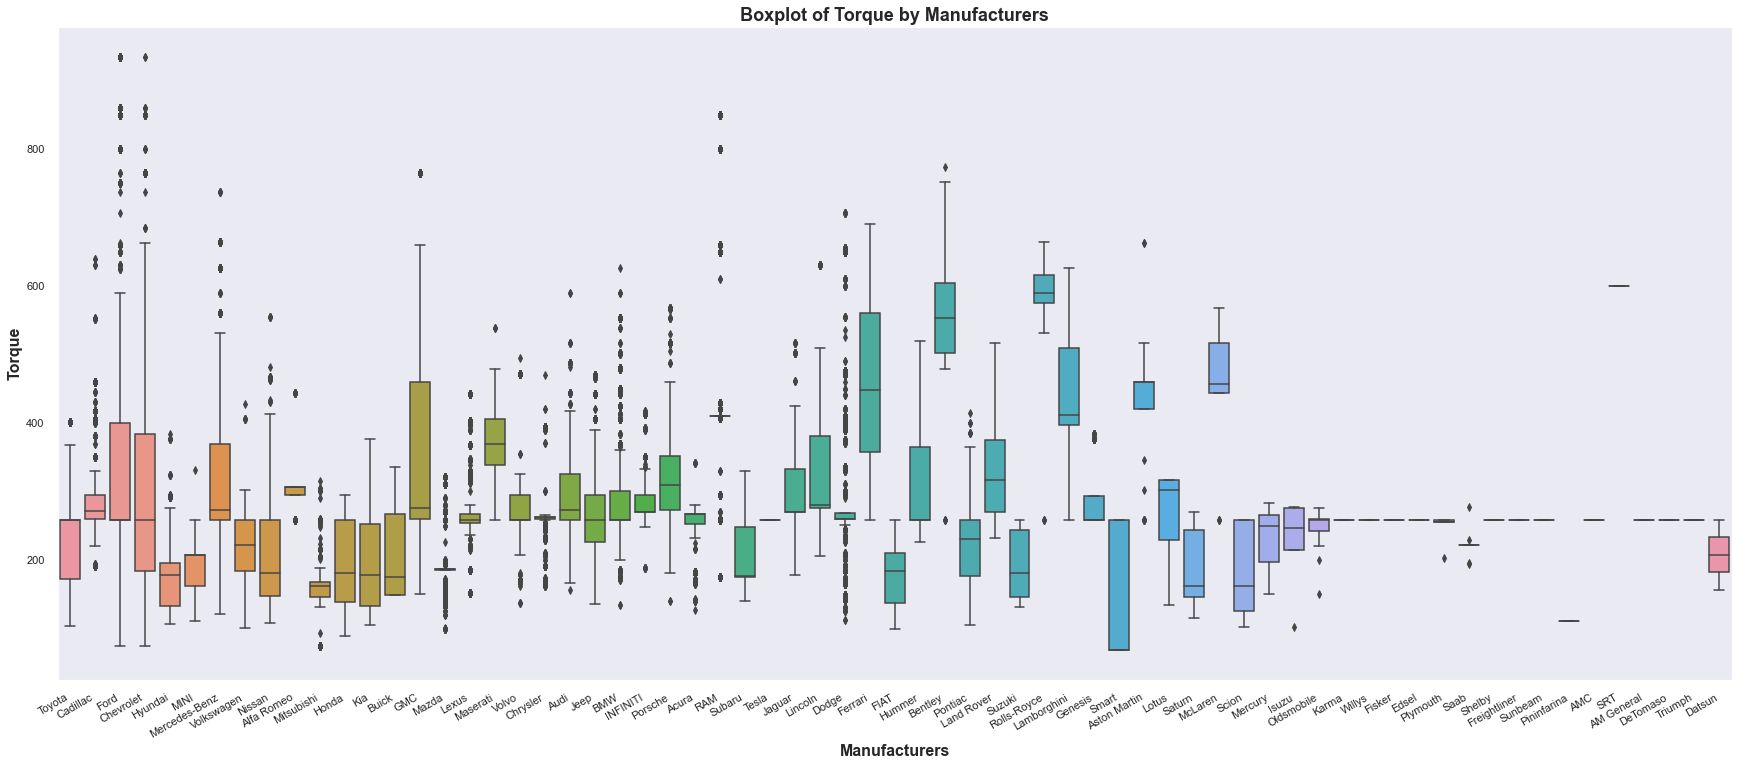

In [48]:
plt.figure(figsize=(30,12))
sns.boxplot(x='Manufacturers', y='Torque', data=df_car)
plt.title('Boxplot of Torque by Manufacturers', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Manufacturers', fontweight='bold', fontsize=16, horizontalalignment='center')
plt.ylabel('Torque', fontweight='bold', fontsize=16, horizontalalignment='center')
plt.xticks(rotation=30, ha='right')

Ferrari, Roys Royce, McLaren and Lamborghini have the highest torque by car manufacturers or brand. These cars are also part of cars with the highest horsepower seen in the earlier boxplot, little wonder these car brands have some of the fastest cars in the world.

In [90]:
#would like to view the body types of the car make
pd.set_option('display.max_rows', 100)
pd.crosstab(df_car.Manufacturers, df_car.Body_Type, normalize='index')

Body_Type,Convertible,Coupe,Hatchback,Minivan,Pickup Truck,SUV / Crossover,Sedan,Unknown,Van,Wagon
Manufacturers,,,,,,,,,,
AM General,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
AMC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Acura,0.000000,0.002518,0.000000,0.000000,0.000000,0.650860,0.344524,0.000000,0.000000,0.002098
Alfa Romeo,0.003774,0.005660,0.000000,0.000000,0.000000,0.433962,0.475472,0.081132,0.000000,0.000000
Aston Martin,0.227273,0.704545,0.000000,0.000000,0.000000,0.000000,0.068182,0.000000,0.000000,0.000000
Audi,0.029647,0.048478,0.000000,0.000000,0.000000,0.469551,0.429487,0.000000,0.000000,0.022837
BMW,0.049989,0.068681,0.000000,0.000000,0.000000,0.431863,0.401869,0.018474,0.000000,0.029124
Bentley,0.256410,0.299145,0.000000,0.000000,0.000000,0.170940,0.273504,0.000000,0.000000,0.000000
Buick,0.004344,0.001158,0.000000,0.000290,0.000000,0.885028,0.107732,0.000000,0.000000,0.001448


This is an attempt to dive deeper into the body types that make up the car brands of this dataset. Ford cars in the dataset are about 37% SUV/Crossover type and has about 32% pick-up truck, the remainder is shared across other body types. Mercedes Benz with about 42% Sedan type and 38% SUV/Crossover. So, it is insightful to know more about the body types of the car manufacturers used in this dataset.

<AxesSubplot:xlabel='Price', ylabel='Density'>

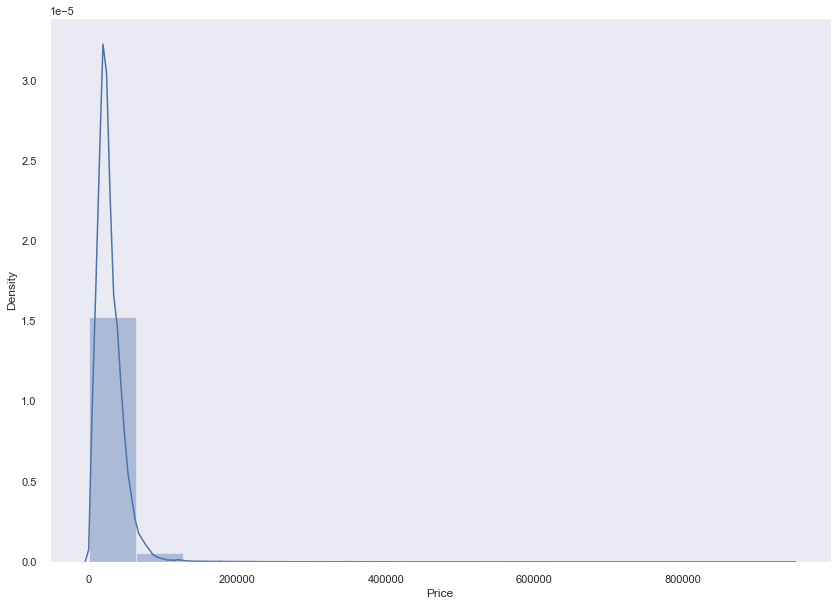

In [49]:
plt.figure(figsize=(14,10))
sns.distplot(df_car['Price'], color='b', bins=15)

For a better understanding about the price distribution of the cars in the dataset, a distplot was graphed. The prices are highly skewed. It shows most of the cars' prices are distributed between 0 and 100,000. Procceeded to see the statistical summary of the price column below, with the minimum price being 750 and maximum price being 945,900... such disparity.

In [50]:
df_car['Price'].describe()

count    194634.000000
mean      28848.591953
std       20006.688723
min         750.000000
25%       16997.000000
50%       24924.000000
75%       36842.000000
max      945900.000000
Name: Price, dtype: float64

In [51]:
#filtered cars whose price are less than or equals 100,000

df_car_100k= df_car[df_car['Price'] <= 100000]
df_car_100k

,City,Body_Type,Days_On_Market,Dealer_Zip,Engine_Cylinders,Engine_Displacement,Exterior_Color,Front_Legroom,Tank_Volume,Fuel_Type,Height,Horsepower,Interior_Color,Is_New,Latitude,Length,Listed_Date,Listing_Color,Longitude,Manufacturers,Maximum_Seating,Mileage,Model,Owner_Count,Price,Seller_Rating,Torque,Transmission_Display,Wheel_System_Display,Wheelbase,Width,Year,Fuel_Economy
0,Denver,Pickup Truck,60-79,80231.0,8,2500.0,Grey,41.9,17.4,Gasoline,66.0,241.0,Black,False,39.6802,189.8,2020-07-08,GRAY,-104.9030,Toyota,5,194490.0,Tundra,3,13900.0,Excellent,258.0,Automatic,Unknown,111.0,75.8,2008,51.0
1,Las Vegas,Sedan,60-79,89146.0,4,2000.0,Wave Metallic,42.4,17.4,Gasoline,57.2,237.0,Jet Black with Jet Black Accents,True,36.1443,193.8,2020-07-07,UNKNOWN,-115.2100,Cadillac,5,14.0,CT5,0,43960.0,Good,405.0,Automatic,Rear-Wheel Drive,116.0,80.3,2020,55.0
2,Scottsdale,SUV / Crossover,80-99,85257.0,6,3500.0,Shadow Black,42.9,18.6,Gasoline,70.0,290.0,Ebony Black,False,33.4657,198.3,2020-06-11,BLACK,-111.9310,Ford,7,30260.0,Explorer,1,27300.0,Good,255.0,Automatic,Front-Wheel Drive,112.8,90.2,2017,41.0
3,Orlando,Sedan,100-119,32809.0,4,2500.0,Slate Metallic,41.9,17.4,Gasoline,66.0,241.0,Black,False,28.4499,189.8,2020-06-06,UNKNOWN,-81.3481,Toyota,5,35843.0,Corolla,1,15198.0,Average,258.0,CVT,Front-Wheel Drive,111.0,75.8,2018,63.0
4,Cincinnati,Hatchback,less than 20 days,45249.0,4,1400.0,Red Hot,41.7,9.0,Gasoline,58.4,98.0,Jet Black,True,39.2980,143.1,2020-09-02,RED,-84.3073,Chevrolet,4,2.0,Spark,0,15495.0,Average,258.0,CVT,Front-Wheel Drive,93.9,62.8,2021,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206234,Las Vegas,Sedan,40-59,89149.0,4,2000.0,SILVER,42.2,14.0,Gasoline,56.5,147.0,None,False,36.2773,181.9,2020-07-18,SILVER,-115.2820,Hyundai,5,43126.0,Elantra,1,14999.0,Average,132.0,Automatic,Front-Wheel Drive,106.3,70.9,2019,65.0
206235,Columbia,Pickup Truck,less than 20 days,29209.0,8,5000.0,Agate Black Metallic,43.9,26.0,Flex Fuel Vehicle,77.2,395.0,M Gray,True,33.9722,231.9,2020-08-22,BLACK,-80.9523,Ford,6,0.0,F-150,0,40888.0,Excellent,400.0,Automatic,Four-Wheel Drive,145.0,96.8,2020,36.0
206236,Raleigh,SUV / Crossover,20-39,27617.0,6,3600.0,Diamond Black Crystal Pearlcoat,40.3,24.6,Gasoline,69.3,295.0,Black,False,35.9012,189.8,2020-08-07,BLACK,-78.7622,Jeep,5,30574.0,Grand Cherokee,1,29980.0,Good,260.0,Automatic,Four-Wheel Drive,114.8,84.8,2017,43.0
206237,Springfield,SUV / Crossover,40-59,65807.0,6,3500.0,Lunar Silver Metallic,41.4,19.5,Gasoline,67.4,290.0,Black (Ebony),True,37.1574,196.2,2020-07-21,SILVER,-93.2955,Acura,7,2.0,MDX,0,56025.0,Excellent,267.0,Automatic,All-Wheel Drive,111.0,77.7,2020,44.0


<AxesSubplot:xlabel='Price', ylabel='Density'>

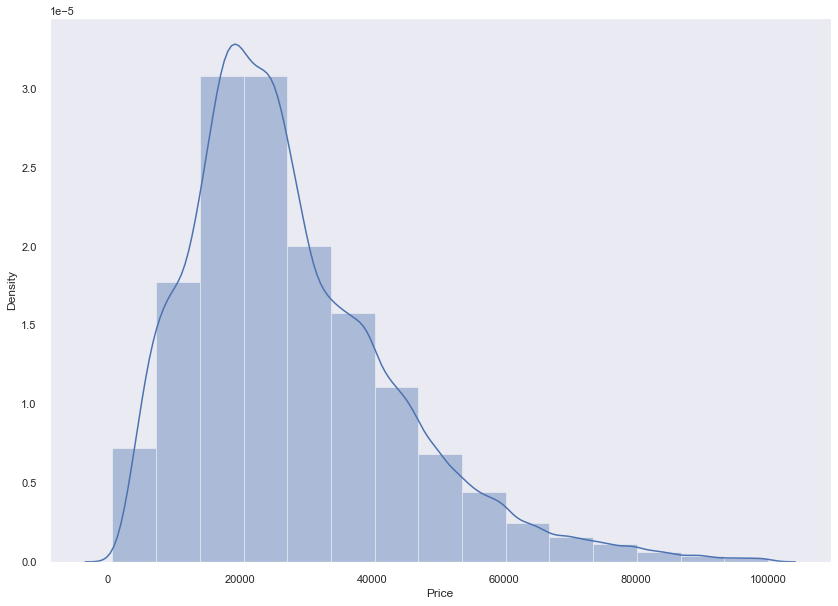

In [52]:
#graphical distribution of cars whose price are below or equals 100,000

plt.figure(figsize=(14,10))
sns.distplot(df_car_100k['Price'], color='b', bins=15)

This distplot shows the prices of cars that range between 0 and 100,000. Though, the plot is skewed, it is not highly skewed as the previous displot.

Text(0, 0.5, 'Price')

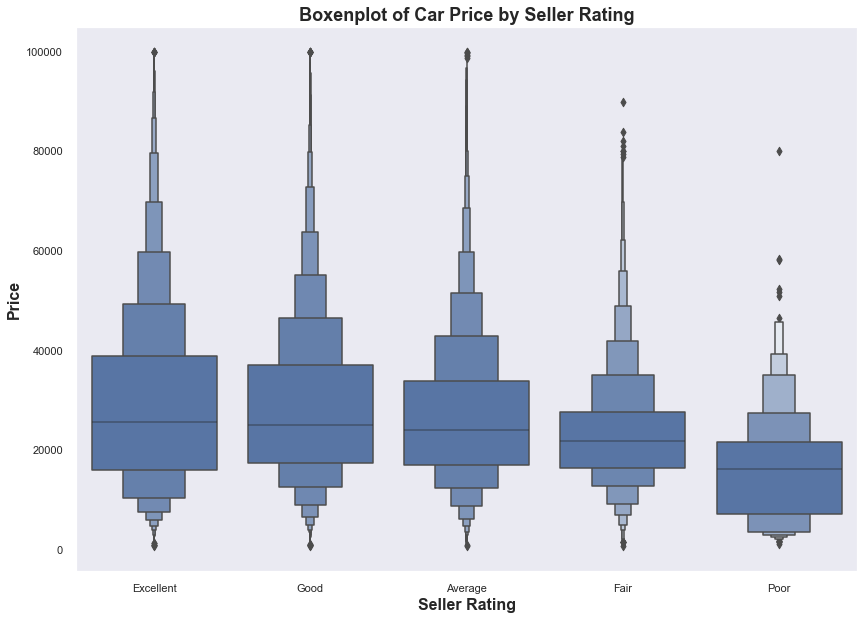

In [53]:
plt.figure(figsize=(14,10))
sns.boxenplot(x='Seller_Rating', y='Price', data=df_car_100k, color='b')
plt.title('Boxenplot of Car Price by Seller Rating', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Seller Rating', fontweight='bold', fontsize=16, horizontalalignment='center')
plt.ylabel('Price', fontweight='bold', fontsize=16, horizontalalignment='center')

The average of price of the cars within the 100,000 bracket tend to go with the sellers rating; the cars rated excellently have the highest average price, then the cars rated good, average , then fair and poorly rated cars have the lowest average price.

In [54]:
df_pairplot = df_car_100k[['Horsepower','Height','Mileage','Torque','Length','Width','Engine_Displacement']]

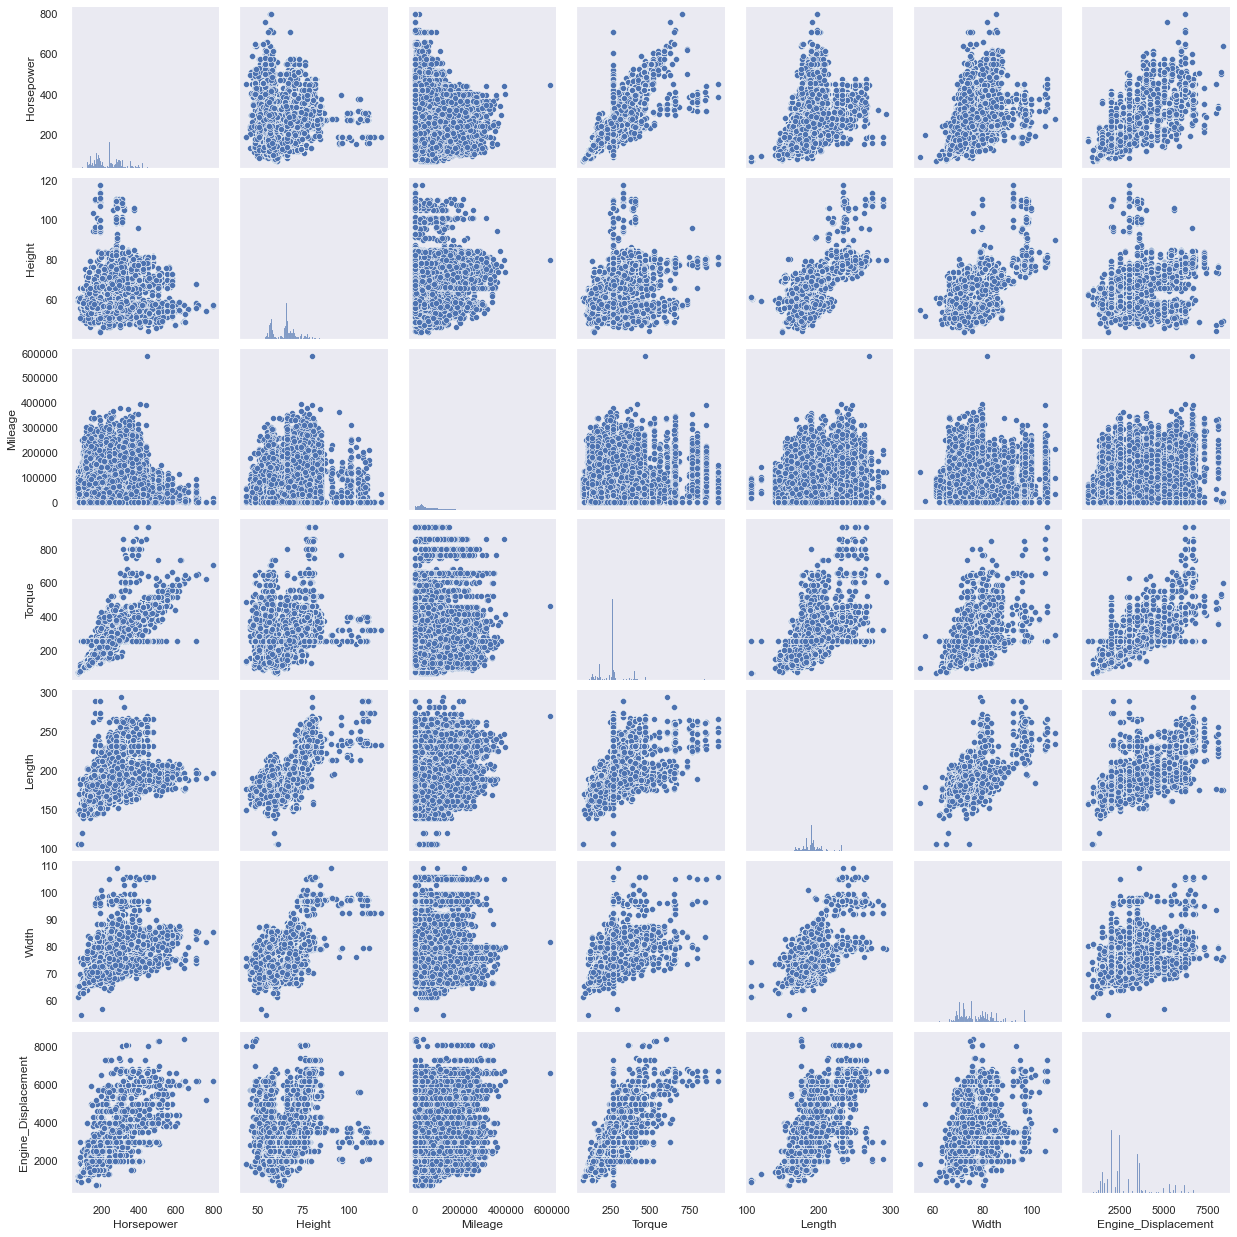

In [55]:
sns.pairplot(df_pairplot)

## Regression Model

So, the interest of this analysis is to run the regression and correlation analysis of the cars whose price are below or equals 100,000.

In [56]:
df_car_100k.columns

Index(['City', 'Body_Type', 'Days_On_Market', 'Dealer_Zip', 'Engine_Cylinders',
       'Engine_Displacement', 'Exterior_Color', 'Front_Legroom', 'Tank_Volume',
       'Fuel_Type', 'Height', 'Horsepower', 'Interior_Color', 'Is_New',
       'Latitude', 'Length', 'Listed_Date', 'Listing_Color', 'Longitude',
       'Manufacturers', 'Maximum_Seating', 'Mileage', 'Model', 'Owner_Count',
       'Price', 'Seller_Rating', 'Torque', 'Transmission_Display',
       'Wheel_System_Display', 'Wheelbase', 'Width', 'Year', 'Fuel_Economy'],
      dtype='object')

In [57]:
X = df_car_100k[['Engine_Cylinders','Engine_Displacement','Front_Legroom', 'Tank_Volume',\
                       'Height', 'Horsepower','Length','Maximum_Seating', 'Mileage','Owner_Count',\
                       'Torque', 'Wheelbase', 'Width', 'Fuel_Economy']]

y = df_car_100k['Price']

In [58]:
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()

pred = reg.predict(X)

resid = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                 3.217e+04
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        15:39:09   Log-Likelihood:            -2.0266e+06
No. Observations:              193353   AIC:                         4.053e+06
Df Residuals:                  193338   BIC:                         4.053e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.45e+04    703.023     20.627      0.000    1.31e+04    1.59e+04
Engine_Cylinders       99.4836     32.077      3.101      0.002      36.614     162.354
Engine_Displacement    -3.0107      0.043    -69.312      0.000      -3.096      -2.926
Front_Legroom         -88.6943     14.555     -6.094      0.000    -117.222     -60.167
Tank_Volume           546.4247      9.210     59.329      0.000     528.373     564.476
Height                215.6095      4.733     45.557      0.000     206.333     224.886
Horsepower            114.9579      0.582    197.589      0.000     113.818     116.098
Length                -31.8614      4.306     -7.399      0.000     -40.302     -23.421
Maximum_Seating        58.8054     20.419      2.880      0.004      18.785      98.826
Mileage                -0.1391      0.001   -214.294      0.000      -0.140      -0.138
Owner_Count         -2318.7188     27.849    -83.260      0.000   -2373.302   -2264.135
Torque                 20.6652      0.356     58.009      0.000      19.967      21.363
Wheelbase            -100.6354      6.005    -16.759      0.000    -112.405     -88.866
Width                -119.3514      4.169    -28.628      0.000    -127.523    -111.180
Fuel_Economy           21.9657      1.574     13.951      0.000      18.880      25.052
==============================================================================
Omnibus:                    54238.848   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           242244.335
Skew:                           1.311   Prob(JB):                         0.00
Kurtosis:                       7.816   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Explanation of the results

This model is analyzed with 14 feature variables. From the regression table, there is a positive relationship between the target variable (price) and 7 of the feature variables; and a negative relationship with 7 other feature variables. This simply means that price and the positive related feature variables move in the same direction: a unit increase in the Tank Volume will lead to an increase, on the average, in the price by 546.42 unit while other variables are held fixed. Meanwhile, for the negatively related feature variables, they move in the opposite direction with price: an increase in the mileage will lead to a decrease, on the average, in the price of the car by 0.139, while other variables remain constant.

Also, the P-values of all the variables are statistically significant. This signifies that these contribute to the model.

The F-Statistic which explains the overall performance of the model. It has a value of 3.217e+04 with probability of 0.00 suggesting that overall, the explanatory variables jointly and significantly explain variation in price.

In addition, the Adjusted R-Squared of this model is 70% which means that the variation of the sale price is explained by the relationship with the feature variables. This shows how well the model fits the data set.

In [59]:
df_reg = df_car_100k[['Engine_Cylinders','Engine_Displacement','Front_Legroom','Tank_Volume',\
                     'Height', 'Horsepower','Length','Maximum_Seating', 'Mileage','Owner_Count',\
                     'Seller_Rating','Torque', 'Wheelbase', 'Width', 'Fuel_Economy', 'Price']]

In [60]:
df_reg = pd.concat([df_reg,pred, resid], axis =1)
df_reg = df_reg.rename(columns={0:'Predicted Price', 1:'Residual'})
df_reg.sort_values('Residual',ascending=False)

,Engine_Cylinders,Engine_Displacement,Front_Legroom,Tank_Volume,Height,Horsepower,Length,Maximum_Seating,Mileage,Owner_Count,Seller_Rating,Torque,Wheelbase,Width,Fuel_Economy,Price,Predicted Price,Residual
192589,4,2300.0,39.6,14.0,53.9,192.0,171.1,4,95753.0,8,Excellent,170.0,101.0,66.1,41.0,89990.0,-4916.253638,94906.253638
68179,6,2500.0,41.9,17.4,66.0,241.0,189.8,5,62000.0,6,Good,258.0,111.0,75.8,51.0,97991.0,13244.711340,84746.288660
63234,8,4900.0,41.7,18.0,56.6,394.0,188.3,5,105000.0,7,Excellent,368.0,111.4,70.9,31.0,100000.0,16252.983912,83747.016088
132279,8,3900.0,41.9,15.0,80.2,182.0,157.1,6,59128.0,5,Good,233.0,92.9,70.5,26.0,92995.0,9403.459177,83591.540823
174441,6,3600.0,38.8,24.0,101.0,280.0,236.0,3,88000.0,2,Excellent,295.0,159.0,98.0,44.0,99998.0,23044.244777,76953.755223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128166,8,6600.0,44.5,63.5,80.1,445.0,239.8,3,15.0,0,Good,464.0,146.3,81.8,51.0,37898.0,73360.935473,-35462.935473
102530,8,4500.0,40.6,26.0,66.9,450.0,188.4,5,56002.0,0,Good,460.0,112.4,75.9,51.0,18995.0,55269.610799,-36274.610799
87739,8,6600.0,44.5,63.5,80.1,445.0,239.8,3,3.0,0,Average,464.0,146.3,81.8,51.0,37085.0,73362.604272,-36277.604272
122110,8,6600.0,44.5,63.5,80.1,445.0,239.8,3,5.0,0,Average,464.0,146.3,81.8,51.0,36500.0,73362.326139,-36862.326139


<Figure size 1440x576 with 0 Axes>

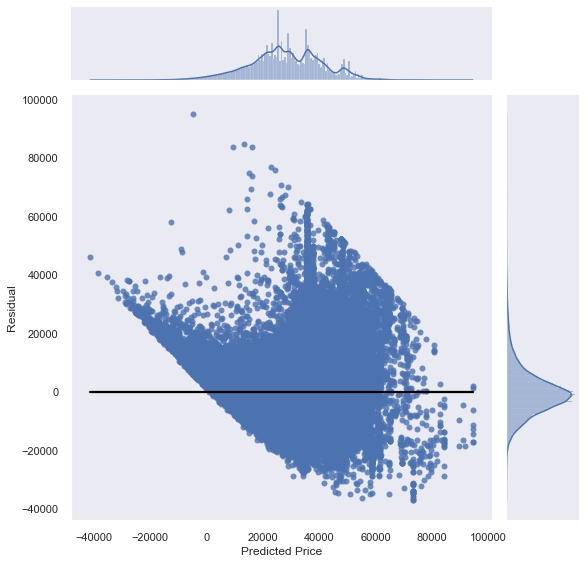

In [61]:
plt.figure(figsize=(20,8))
sns.jointplot(x='Predicted Price', y='Residual', kind='reg', data=df_reg, ratio=5, height=8, line_kws={'color':'black'})

The jointplot shows how the predicted price differs from the actual price of the cars. The residual indicates how far the predicted prices are from the actual prices.

### Correlation Matrix

In [62]:
corrMatrix = df_car_100k[['Engine_Cylinders','Engine_Displacement','Front_Legroom', 'Tank_Volume',\
                          'Height', 'Horsepower','Length','Maximum_Seating', 'Mileage','Owner_Count',\
                          'Seller_Rating','Torque', 'Wheelbase', 'Width', 'Fuel_Economy']].corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
df_corrMatrix

,Engine_Cylinders,Engine_Displacement,Front_Legroom,Tank_Volume,Height,Horsepower,Length,Maximum_Seating,Mileage,Owner_Count,Torque,Wheelbase,Width,Fuel_Economy
Engine_Cylinders,1.000000,0.884669,0.122290,0.726159,0.527000,0.805383,0.675206,0.340478,0.164767,0.129132,0.658785,0.650017,0.439105,-0.498832
Engine_Displacement,0.884669,1.000000,0.174023,0.814878,0.590688,0.829948,0.772021,0.339805,0.153817,0.102178,0.741981,0.751104,0.470939,-0.456065
Front_Legroom,0.122290,0.174023,1.000000,0.143084,-0.059677,0.169845,0.245844,-0.030442,-0.029055,-0.005275,0.105401,0.200580,0.102901,0.000709
Tank_Volume,0.726159,0.814878,0.143084,1.000000,0.718304,0.764322,0.845601,0.359427,0.124623,0.044336,0.734417,0.839635,0.632790,-0.452537
Height,0.527000,0.590688,-0.059677,0.718304,1.000000,0.528141,0.666571,0.457900,-0.019924,-0.128521,0.541287,0.701523,0.579099,-0.403026
Horsepower,0.805383,0.829948,0.169845,0.764322,0.528141,1.000000,0.729058,0.313810,-0.007525,-0.007909,0.808977,0.704165,0.635451,-0.485205
Length,0.675206,0.772021,0.245844,0.845601,0.666571,0.729058,1.000000,0.374005,0.022775,-0.053007,0.718086,0.961163,0.629491,-0.341247
Maximum_Seating,0.340478,0.339805,-0.030442,0.359427,0.457900,0.313810,0.374005,1.000000,0.022385,-0.043665,0.237827,0.302330,0.306328,-0.249074
Mileage,0.164767,0.153817,-0.029055,0.124623,-0.019924,-0.007525,0.022775,0.022385,1.000000,0.739020,0.006683,0.001171,-0.068520,-0.135324
Owner_Count,0.129132,0.102178,-0.005275,0.044336,-0.128521,-0.007909,-0.053007,-0.043665,0.739020,1.000000,-0.026218,-0.073326,-0.108531,-0.104474


Text(0.5, 1.0, 'Heatmap Correlation of Features')

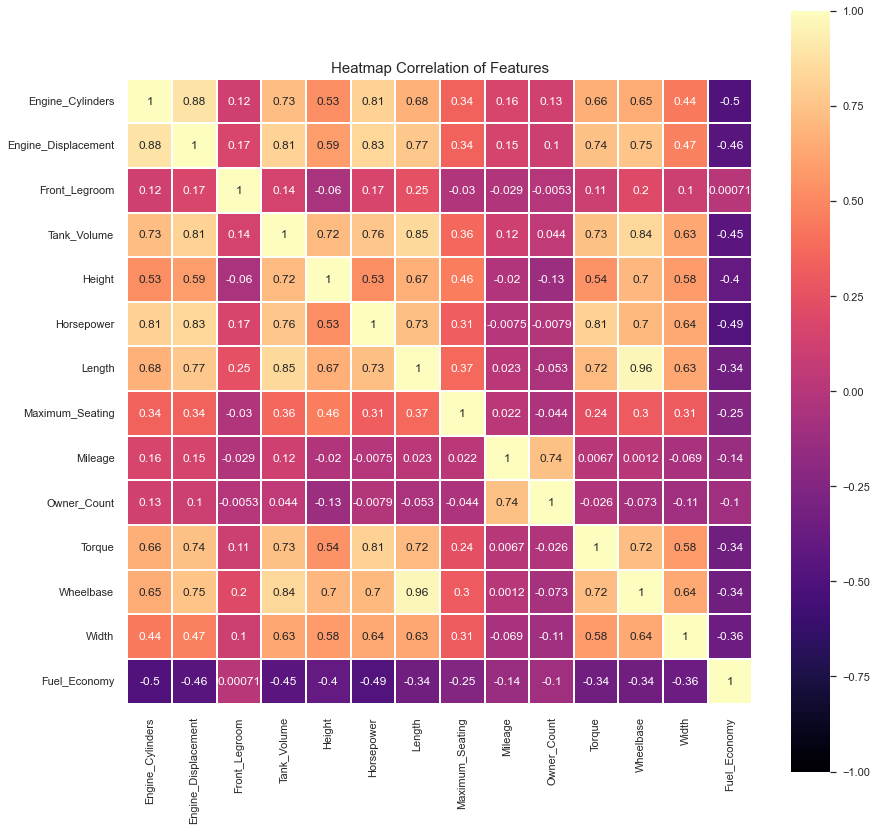

In [86]:
colormap = plt.cm.magma
plt.figure(figsize=(14,14))
sns.heatmap(df_corrMatrix, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('Heatmap Correlation of Features', size=15)

Correlation tells the degree at which two variables are related. It is important to note that correlation between variables doen not mean that one variable causes the other to happen. From this correlaion matrix, while disregarding the diagonal value because it is just the variable against itself. Below I show the variables that have the highest correlation value:
 - Length and Wheelbase: 0.96
 - Engine Displacemnet and Engine Cylinders: 0.88
 - Tank Volumen and Length : 0.85
 - Tank Volume and Wheelbase: 0.84